Name : Gourav Verma<br>
Method : Python<br>
DSC-640 Week 5-6<br>
Visualizing Proportions

In [15]:
# Import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify
from datetime import datetime as dt
import numpy as np

In [9]:
expd = pd.read_csv('expenditures.txt', sep = '\t', header=0)
unmpd = pd.read_csv('unemployement-rate-1948-2010.csv')

In [10]:
# Calculate total expenditure for categories
expd_cat =  expd.groupby(['category'])['expenditure'].sum().reset_index()
expd_cat.head()

,category,expenditure
0,Alcoholic Beverages,8424
1,Apparel,41833
2,Cash Contributions,27987
3,Education,14498
4,Entertainment,44273


In [11]:
# Calculate total expenditure by year
expd_yr = expd.groupby(['year'])['expenditure'].sum().reset_index()
expd_yr.head()

,year,expenditure
0,1984,21972
1,1985,23489
2,1986,23865
3,1987,24415
4,1988,25893


### Tree Map

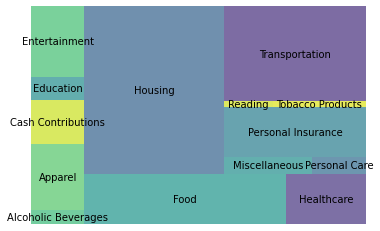

In [12]:
# Create tree map
squarify.plot(sizes=expd_cat['expenditure'], label=expd_cat['category'], alpha=.7 ) 
plt.axis('off') 
plt.show()

### Area Chart

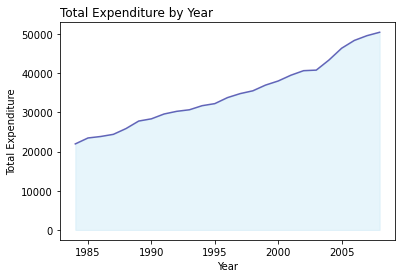

In [13]:
# Create x and y values to plot
x = expd_yr['year']
y = expd_yr['expenditure']
 
# Add a stronger line on top (edge)
plt.fill_between( x, y, color='skyblue', alpha=0.2)
plt.title('Total Expenditure by Year', loc='left')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(x, y, color='darkblue', alpha=0.6)

### Stacked Area Chart

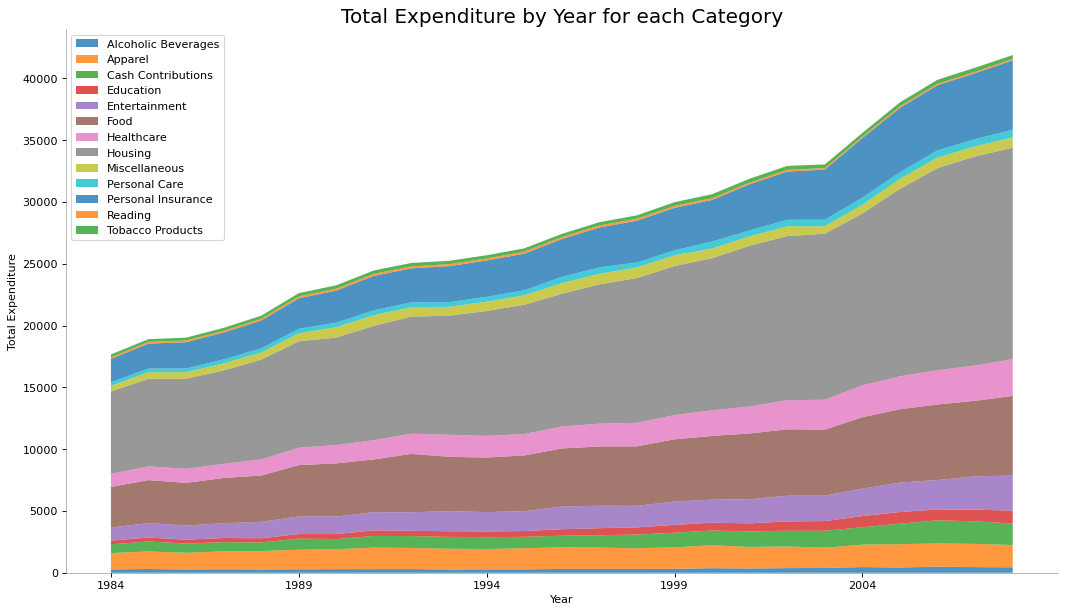

In [16]:
# Reshape data to be used for stacked area chart
plt_expenditures = expd.loc[:, expd.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
plt_expenditures.reset_index(level=0, inplace=True)

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = plt_expenditures.columns[1:]
labs = plt_expenditures.values.tolist()

# Prepare data
x  = plt_expenditures['year'].values.tolist()
y0 = plt_expenditures[columns[0]].values.tolist()
y1 = plt_expenditures[columns[1]].values.tolist()
y2 = plt_expenditures[columns[2]].values.tolist()
y3 = plt_expenditures[columns[3]].values.tolist()
y4 = plt_expenditures[columns[4]].values.tolist()
y5 = plt_expenditures[columns[5]].values.tolist()
y6 = plt_expenditures[columns[6]].values.tolist()
y7 = plt_expenditures[columns[7]].values.tolist()
y8 = plt_expenditures[columns[8]].values.tolist()
y9 = plt_expenditures[columns[9]].values.tolist()
y10 = plt_expenditures[columns[10]].values.tolist()
y11 = plt_expenditures[columns[11]].values.tolist()
y12 = plt_expenditures[columns[12]].values.tolist()
y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)

# Create title
ax.set_title('Total Expenditure by Year for each Category', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

# Show legend
ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

# Output graph
plt.show()
